# Data augmentation example
This example shows you how to augment images using various methods provided by the keras library.

In [12]:
#!pip install tensorflow_datasets

In [2]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

## Load the dataset you want to augment

(333, 500, 3)


2022-10-18 10:16:47.636948: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


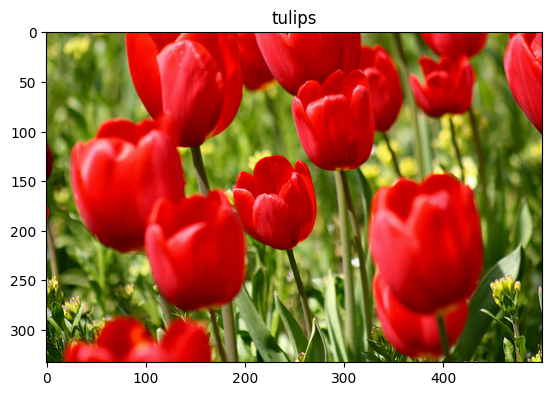

In [19]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
plt.imshow(image)
plt.title(get_label_name(label));
print(image.shape)

## Augmentation using resizing and rescaling

Augment images as resizing and rescaling techniques. In this case we are changing the dimensions from (333, 500) to (180, 180):

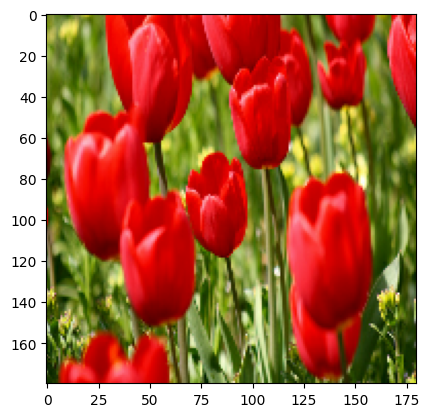

In [11]:
from keras import layers
import tensorflow as tf

IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

result = resize_and_rescale(image)
plt.imshow(result);

## Augmentation using random flips and rotations

2022-10-18 10:20:37.767233: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


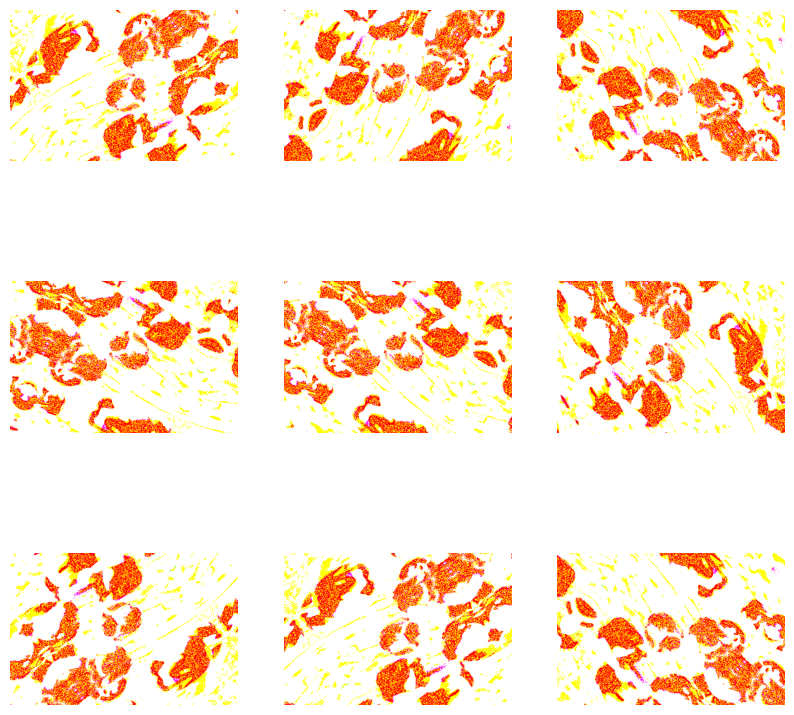

In [36]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

image, label = next(iter(train_ds))
plt.figure(figsize=(10, 10))

for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image)
  plt.axis("off")


## More on data augmentation using keras:
- https://www.tensorflow.org/tutorials/images/data_augmentation
- https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/